In [3]:
import tensorflow as tf

In [6]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [8]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /Users/rishabhsingh/tensorflow_datasets/fashion_mnist/3.0.1.incomplete6JQZR5/fashion_mnist-train.tfrecord
Shuffling and writing examples to /Users/rishabhsingh/tensorflow_datasets/fashion_mnist/3.0.1.incomplete6JQZR5/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /Users/rishabhsingh/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [10]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [11]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

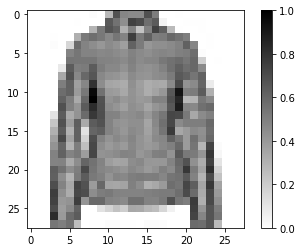

In [12]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

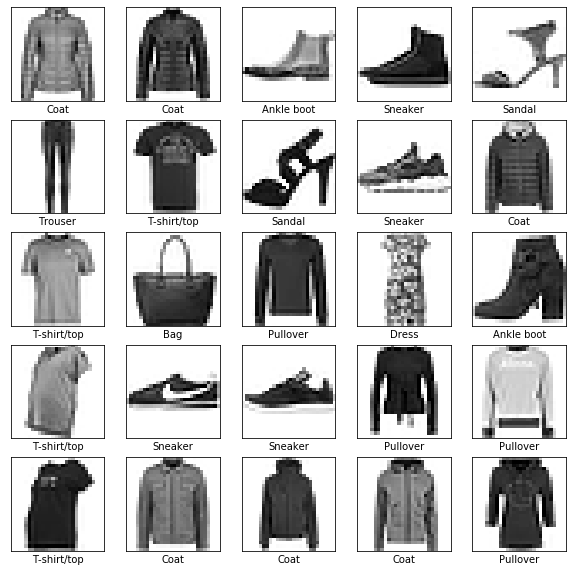

In [13]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [17]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3990 - accuracy: 0.8558
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2572 - accuracy: 0.9064
Epoch 3/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2136 - accuracy: 0.9220
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1854 - accuracy: 0.9312
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1557 - accuracy: 0.9424
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1327 - accuracy: 0.9513
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1150 - accuracy: 0.9568
Epoch 8/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0972 - accuracy: 0.9645
Epoch 9/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0820 - accuracy: 0.9701
Epoch 10/10
1875/1875 [====================

In [18]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 11ms/step - loss: 0.2947 - accuracy: 0.9199
Accuracy on test dataset: 0.9199


In [19]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [20]:
predictions.shape

(32, 10)

In [21]:
predictions[0]

array([ -8.88868   , -10.977764  ,   0.18802768, -12.548183  ,
         8.572824  , -11.392961  ,   1.128624  , -18.624784  ,
       -10.947769  , -12.353605  ], dtype=float32)

In [22]:
np.argmax(predictions[0])

4

In [23]:
test_labels[0]

4

In [24]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

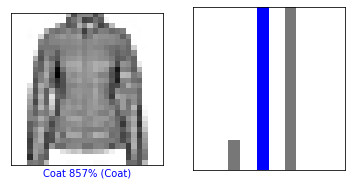

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

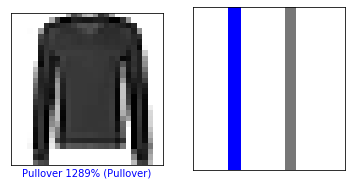

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

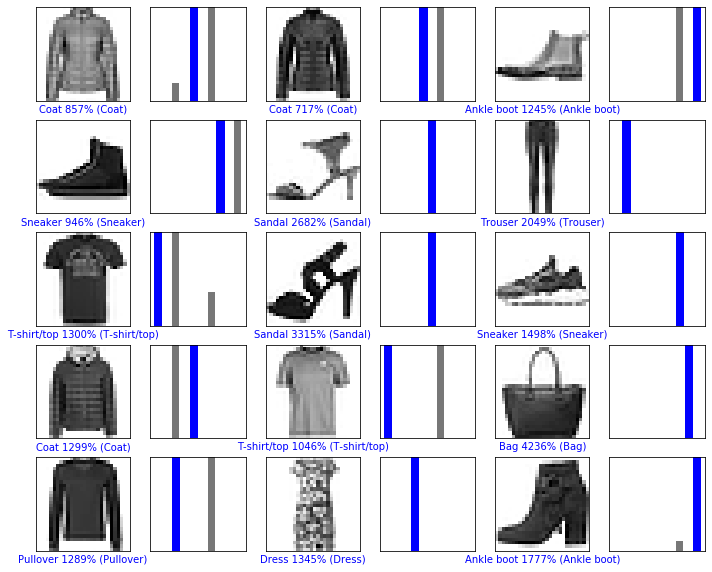

In [27]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [28]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [29]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[ -8.888681   -10.977764     0.18802744 -12.548187     8.5728245
  -11.392962     1.1286224  -18.624784   -10.94777    -12.353608  ]]


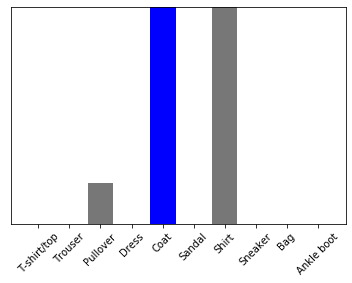

In [31]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [32]:
np.argmax(predictions_single[0])

4